In [12]:
'''
Autora: Mariana Queiroz
Data: Nov. 2021
Este projeto tem o objetivo de analisar o conjunto
de dados que apresenta os valores das moedas de todo o mundo
com relação ao euro. Assim, foram gerados alguns gráficos que
apresentam a relação de variação do dólar americano e do real
com o euro.
'''
# importando bibliotecas
import logging
import pandas as pd
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline

# configurando o logging
logging.basicConfig(
    filename='./results.log',
    level=logging.INFO,
    filemode='w',
    format='%(name)s - %(levelname)s - %(message)s')

In [24]:
# lendo csv
def read_data(file_path):
    """Read data from csv.

    Args:
      file_path (str): file path to read.
    
    Return:
        df_file (DataFrame): returns the file read as a dataframe.
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except: # pylint: disable=bare-except
        logging.error("We were not able to find %s", file_path)
        
EXCHANGE_RATES = read_data("euro-daily-hist_1999_2020.csv")

In [14]:
# tratando dados: renomeando colunas e convertendo para data
EXCHANGE_RATES.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time',
                               '[Brazilian real ]':'BR_real'},
                      inplace=True)
EXCHANGE_RATES['Time'] = pd.to_datetime(EXCHANGE_RATES['Time'])
EXCHANGE_RATES.sort_values('Time', inplace=True)
EXCHANGE_RATES.reset_index(drop=True, inplace=True)
EXCHANGE_RATES.head()

,Time,[Australian dollar ],[Bulgarian lev ],BR_real,[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [15]:
# separando dataframes com os dados que serão utilizados
EURO_TO_DOLAR = EXCHANGE_RATES[['US_dollar', 'Time']]
EURO_TO_REAL = EXCHANGE_RATES[['Time', 'BR_real']]

In [16]:
# removendo dados que não interessam
EURO_TO_DOLAR = EURO_TO_DOLAR[EURO_TO_DOLAR['US_dollar'] != '-']
EURO_TO_REAL = EURO_TO_REAL[EURO_TO_REAL['BR_real'] != '-']

In [17]:
# convertendo para o tipo float
EURO_TO_DOLAR['US_dollar'] = EURO_TO_DOLAR['US_dollar'].astype(float)
EURO_TO_REAL['BR_real'] = EURO_TO_REAL['BR_real'].astype(float)

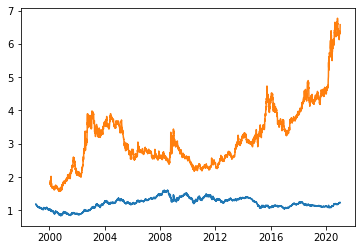

In [18]:
# analisando os graficos iniciais
plt.plot(EURO_TO_DOLAR['Time'], EURO_TO_DOLAR['US_dollar'])
plt.plot(EURO_TO_REAL['Time'], EURO_TO_REAL['BR_real'])
plt.show()

In [19]:
# calculando a média móvel de cada país
def rolling_mean(dataframe, coin, window):
    """Calculates the moving average of the currency 
    value against the euro according to the moving window.

    Args:
      df (DataFrame): The DataFrame that contains the datas.
      coin (str): The corresponding coin.
      window (int): number of moving window
    """
    dataframe['rolling_mean'] = dataframe[coin].rolling(window).mean()

rolling_mean(EURO_TO_DOLAR, 'US_dollar', 30)
rolling_mean(EURO_TO_REAL, 'BR_real', 30)

In [20]:
# definindo o estilo dos gráficos
style.use('fivethirtyeight')

# separando os dados dos EUA por presidente
BUSH_OBAMA_TRUMP = EURO_TO_DOLAR[(EURO_TO_DOLAR['Time'].dt.year >= 2001) &
                                 (EURO_TO_DOLAR['Time'].dt.year < 2021)]
BUSH = BUSH_OBAMA_TRUMP[BUSH_OBAMA_TRUMP['Time'].dt.year < 2009]
OBAMA = BUSH_OBAMA_TRUMP[(BUSH_OBAMA_TRUMP['Time'].dt.year >= 2009) &
                         (BUSH_OBAMA_TRUMP['Time'].dt.year < 2017)]
TRUMP = BUSH_OBAMA_TRUMP[(BUSH_OBAMA_TRUMP['Time'].dt.year >= 2017) &
                         (BUSH_OBAMA_TRUMP['Time'].dt.year < 2021)]

# separando os dados do Brasil por presidente
LULA_DILMA_TEMER_BOLSONARO = EURO_TO_REAL[(EURO_TO_REAL['Time'].dt.year >= 2003) &
                                          (EURO_TO_REAL['Time'].dt.year < 2021)]
LULA = LULA_DILMA_TEMER_BOLSONARO[(LULA_DILMA_TEMER_BOLSONARO['Time'].dt.year >= 2003) &
                                  (LULA_DILMA_TEMER_BOLSONARO['Time'].dt.year <= 2010)]
DILMA_TEMER = LULA_DILMA_TEMER_BOLSONARO[(LULA_DILMA_TEMER_BOLSONARO['Time'].dt.year >= 2011) &
                                         (LULA_DILMA_TEMER_BOLSONARO['Time'].dt.year <= 2018)]
BOLSONARO = LULA_DILMA_TEMER_BOLSONARO[(LULA_DILMA_TEMER_BOLSONARO['Time'].dt.year >= 2019) &
                                       (LULA_DILMA_TEMER_BOLSONARO['Time'].dt.year <= 2020)]

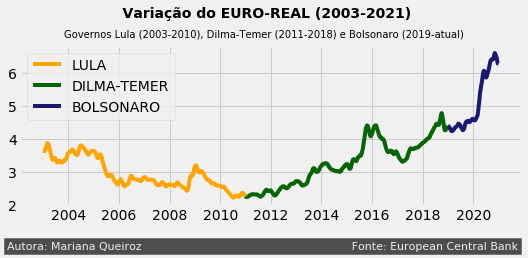

In [21]:
# definindo tamanho da imagem do gráfico
plt.figure(figsize=(8, 6))

#definindo os subplots
plt.subplot(2, 1, 2)

# plotando os dados dos governos
plt.plot(LULA['Time'], LULA['rolling_mean'],
         label="LULA", color='#ffa500')
plt.plot(DILMA_TEMER['Time'], DILMA_TEMER['rolling_mean'],
         label="DILMA-TEMER", color='#006400')
plt.plot(BOLSONARO['Time'], BOLSONARO['rolling_mean'],
         label="BOLSONARO", color='#191970')
plt.legend()

#definindo titulo e subtitulo
plt.text(731516.0, 7.7, '            Variação do EURO-REAL (2003-2021)',
         fontsize=14, weight='bold')
plt.text(731516.0, 7.1,
         '''Governos Lula (2003-2010), Dilma-Temer (2011-2018) e Bolsonaro (2019-atual)''',
         fontsize=10)

#definindo footer
plt.text(730700.0, 0.65, 'Autora: Mariana Queiroz' + ' '*60 + 'Fonte: European Central Bank',
         color='#f0f0f0', backgroundcolor='#4d4d4d',
         size=11)

plt.savefig('euro-real.png', format='png')
plt.show()

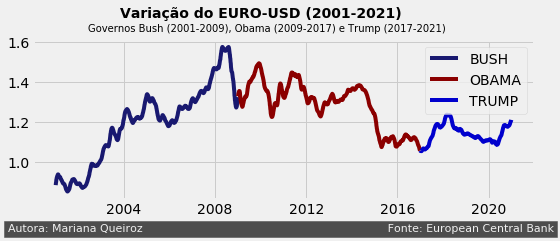

In [22]:
# definindo tamanho da imagem do gráfico
plt.figure(figsize=(8, 6))

#definindo os subplots
plt.subplot(2, 1, 2)

# plotando os dados dos governos
plt.plot(BUSH['Time'], BUSH['rolling_mean'],
         label="BUSH", color='#191970')
plt.plot(OBAMA['Time'], OBAMA['rolling_mean'],
         label="OBAMA", color='#8B0000')
plt.plot(TRUMP['Time'], TRUMP['rolling_mean'],
         label="TRUMP", color='#0000CD')

# habilitando as legendas
plt.legend()

#definindo titulo e sub-titulo
plt.text(731516.0, 1.72, ''*22+'''Variação do EURO-USD (2001-2021)''',
         fontsize=14, weight='bold')
plt.text(731000.0, 1.65, 'Governos Bush (2001-2009), Obama (2009-2017) e Trump (2017-2021)',
         fontsize=10)

#definindo footer
plt.text(729716.0, 0.65, 'Autora: Mariana Queiroz' + ' '*70 + 'Fonte: European Central Bank',
         color='#f0f0f0', backgroundcolor='#4d4d4d',
         size=11)

plt.savefig('euro-dolar.png', format='png')
plt.show()

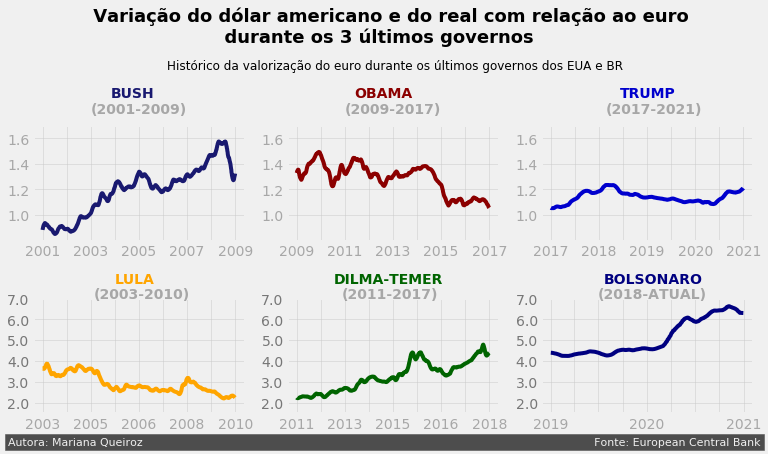

In [23]:
# definindo tamanho da imagem do gráfico
plt.figure(figsize=(10, 5))

# definindo o tamanho entre os subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.1,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.5)

# criando os subplots
AX1 = plt.subplot(2, 3, 1)
AX2 = plt.subplot(2, 3, 2)
AX3 = plt.subplot(2, 3, 3)
AX4 = plt.subplot(2, 3, 4)
AX5 = plt.subplot(2, 3, 5)
AX6 = plt.subplot(2, 3, 6)

#criando arrays dos subplots
AXES1 = [AX1, AX2, AX3]
AXES2 = [AX4, AX5, AX6]

# definindo os subplots dos dados dos EUA
for ax in AXES1:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'],
                       alpha=0.3)
    ax.grid(alpha=0.5)

# definindo os subplots dos dados dos Brasil
for ax in AXES2:
    ax.set_ylim(1.5, 7.0)
    ax.set_yticks([2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
    ax.set_yticklabels(['2.0', '3.0', '4.0', '5.0', '6.0', '7.0'],
                       alpha=0.5)
    ax.grid(alpha=0.5)

# configurando o ax1: Bush
AX1.plot(BUSH['Time'], BUSH['rolling_mean'],
         color='#191970')
AX1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                    alpha=0.3)
AX1.text(731516.0, 1.92, 'BUSH', fontsize=14, weight='bold',
         color='#191970')
AX1.text(731216.0, 1.8, '(2001-2009)', weight='bold',
         alpha=0.3)

# configurando o ax2: Obama
AX2.plot(OBAMA['Time'], OBAMA['rolling_mean'],
         color='#8B0000')
AX2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                    alpha=0.3)
AX2.text(734288.0, 1.92, 'OBAMA', fontsize=14, weight='bold',
         color='#8B0000')
AX2.text(734138.0, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)

# configurando o ax3: Trump
AX3.plot(TRUMP['Time'], TRUMP['rolling_mean'],
         color='#0000CD')
AX3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                    alpha=0.3)
AX3.text(736855.0, 1.92, 'TRUMP', fontsize=14, weight='bold',
         color='#0000CD')
AX3.text(736745.0, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

# configurando o ax4: lula
AX4.plot(LULA['Time'], LULA['rolling_mean'],
         color='#ffa500')
AX4.set_xticklabels(['', '2003', '', '2005', '', '2006', '',
                     '2008', '', '2010'], alpha=0.3)
AX4.text(732316.0, 7.7, 'LULA', fontsize=14, weight='bold', color='#ffa500')
AX4.text(732000.0, 7.0, '(2003-2010)', weight='bold', alpha=0.3)

# configurando o ax5: dilma_temer
AX5.plot(DILMA_TEMER['Time'], DILMA_TEMER['rolling_mean'],
         color='#006400')
AX5.set_xticklabels(['', '2011', '', '2013', '', '2015', '',
                     '2016', '', '2018'],
                    alpha=0.3)
AX5.text(734700.0, 7.7, 'DILMA-TEMER', fontsize=14, weight='bold', color='#006400')
AX5.text(734830.0, 7.0, '(2011-2017)', weight='bold', alpha=0.3)

# configurando o ax4: bolsonaro
AX6.plot(BOLSONARO['Time'], BOLSONARO['rolling_mean'],
         color='#000080')
AX6.set_xticklabels(['2019', '', '', '', '2020', '', '', '', '2021'],
                    alpha=0.3)
AX6.text(737260.0, 7.7, 'BOLSONARO', fontsize=14, weight='bold', color='#000080')
AX6.text(737240.0, 7.0, '(2018-ATUAL)', weight='bold', alpha=0.3)

# adicionando título e sub-titulo
AX1.text(730016.0, 2.35, ' '*13+'''Variação do dólar americano e do real com relação ao euro
                                  durante os 3 últimos governos''',
         fontsize=18, weight='bold')
AX1.text(730016.0, 2.14,
         ' '*40+'''Histórico da valorização do euro durante os últimos governos dos EUA e BR''',
         fontsize=12)

# adicionando footer
AX4.text(730700.0, 0.0, 'Autora: Mariana Queiroz' + ' '*129 + 'Fonte: European Central Bank',
         color='#f0f0f0', backgroundcolor='#4d4d4d',
         size=11)

# salvando a imagem do grafico como png
plt.savefig('euro-dolar-real.png', format='png')
plt.show()